<a href="https://colab.research.google.com/github/Ambigapathi-V/Credit-Card-Fraud-Detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## 1.Dataset Preparation

In [119]:
## Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [120]:
!pip install patool

import gdown
import patoolib
import os
import pandas as pd

# Google Drive file ID (Extract from the URL)
file_id = "1L1IQrgiLU0aRVb26iE1aAs-RtQIr63ma"
output_file = "data.rar"

# Step 1: Download the .rar file from Google Drive
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", output_file, quiet=False)

# Step 2: Extract the .rar file
extract_folder = "extracted_data"
os.makedirs(extract_folder, exist_ok=True)
patoolib.extract_archive(output_file, outdir=extract_folder)

# Step 3: Identify the extracted file
extracted_files = os.listdir(extract_folder)
csv_file = [file for file in extracted_files if file.endswith('.csv')][0]  # Assuming CSV file is inside

# Step 4: Load the CSV into a Pandas DataFrame
df = pd.read_csv(os.path.join(extract_folder, csv_file))
df1 = df.copy()[:500]

print("Data loaded sucessfully")

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1L1IQrgiLU0aRVb26iE1aAs-RtQIr63ma
From (redirected): https://drive.google.com/uc?export=download&id=1L1IQrgiLU0aRVb26iE1aAs-RtQIr63ma&confirm=t&uuid=6e55625d-a2ed-4bb8-8e94-f56e202735e5
To: /content/data.rar
100%|██████████| 69.2M/69.2M [00:02<00:00, 26.4MB/s]
INFO patool: Extracting data.rar ...
INFO:patool:Extracting data.rar ...
INFO patool: running /usr/bin/7z x -aou -oextracted_data -- data.rar
INFO:patool:running /usr/bin/7z x -aou -oextracted_data -- data.rar
INFO patool: ... data.rar extracted to `extracted_data'.
INFO:patool:... data.rar extracted to `extracted_data'.


Data loaded sucessfully


In [121]:
## Print the top data points

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 2.Data Preprocessing

In [123]:
## Number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("------------------")

## Print the null values
print("Null Values:")
print(df.isnull().sum().sum())
df.describe()


Number of rows: 284807
Number of columns: 31
------------------
Null Values:
0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [124]:
# 1. Count the number of fraud and non-fraud transactions
fraud_count = df['Class'].value_counts()
fraud_ratio = df['Class'].value_counts(normalize=True) * 100  # Percentage of each class

print("Transaction Class Distribution:")
print(fraud_count)
print("\nPercentage Distribution:")
print(fraud_ratio)


Transaction Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


## 3.Exploratory Data Analysis(EDA)

In [125]:
## Make 10000 samples of the data for analysis of the data
df_sample = df.sample(n=10000, random_state=1)

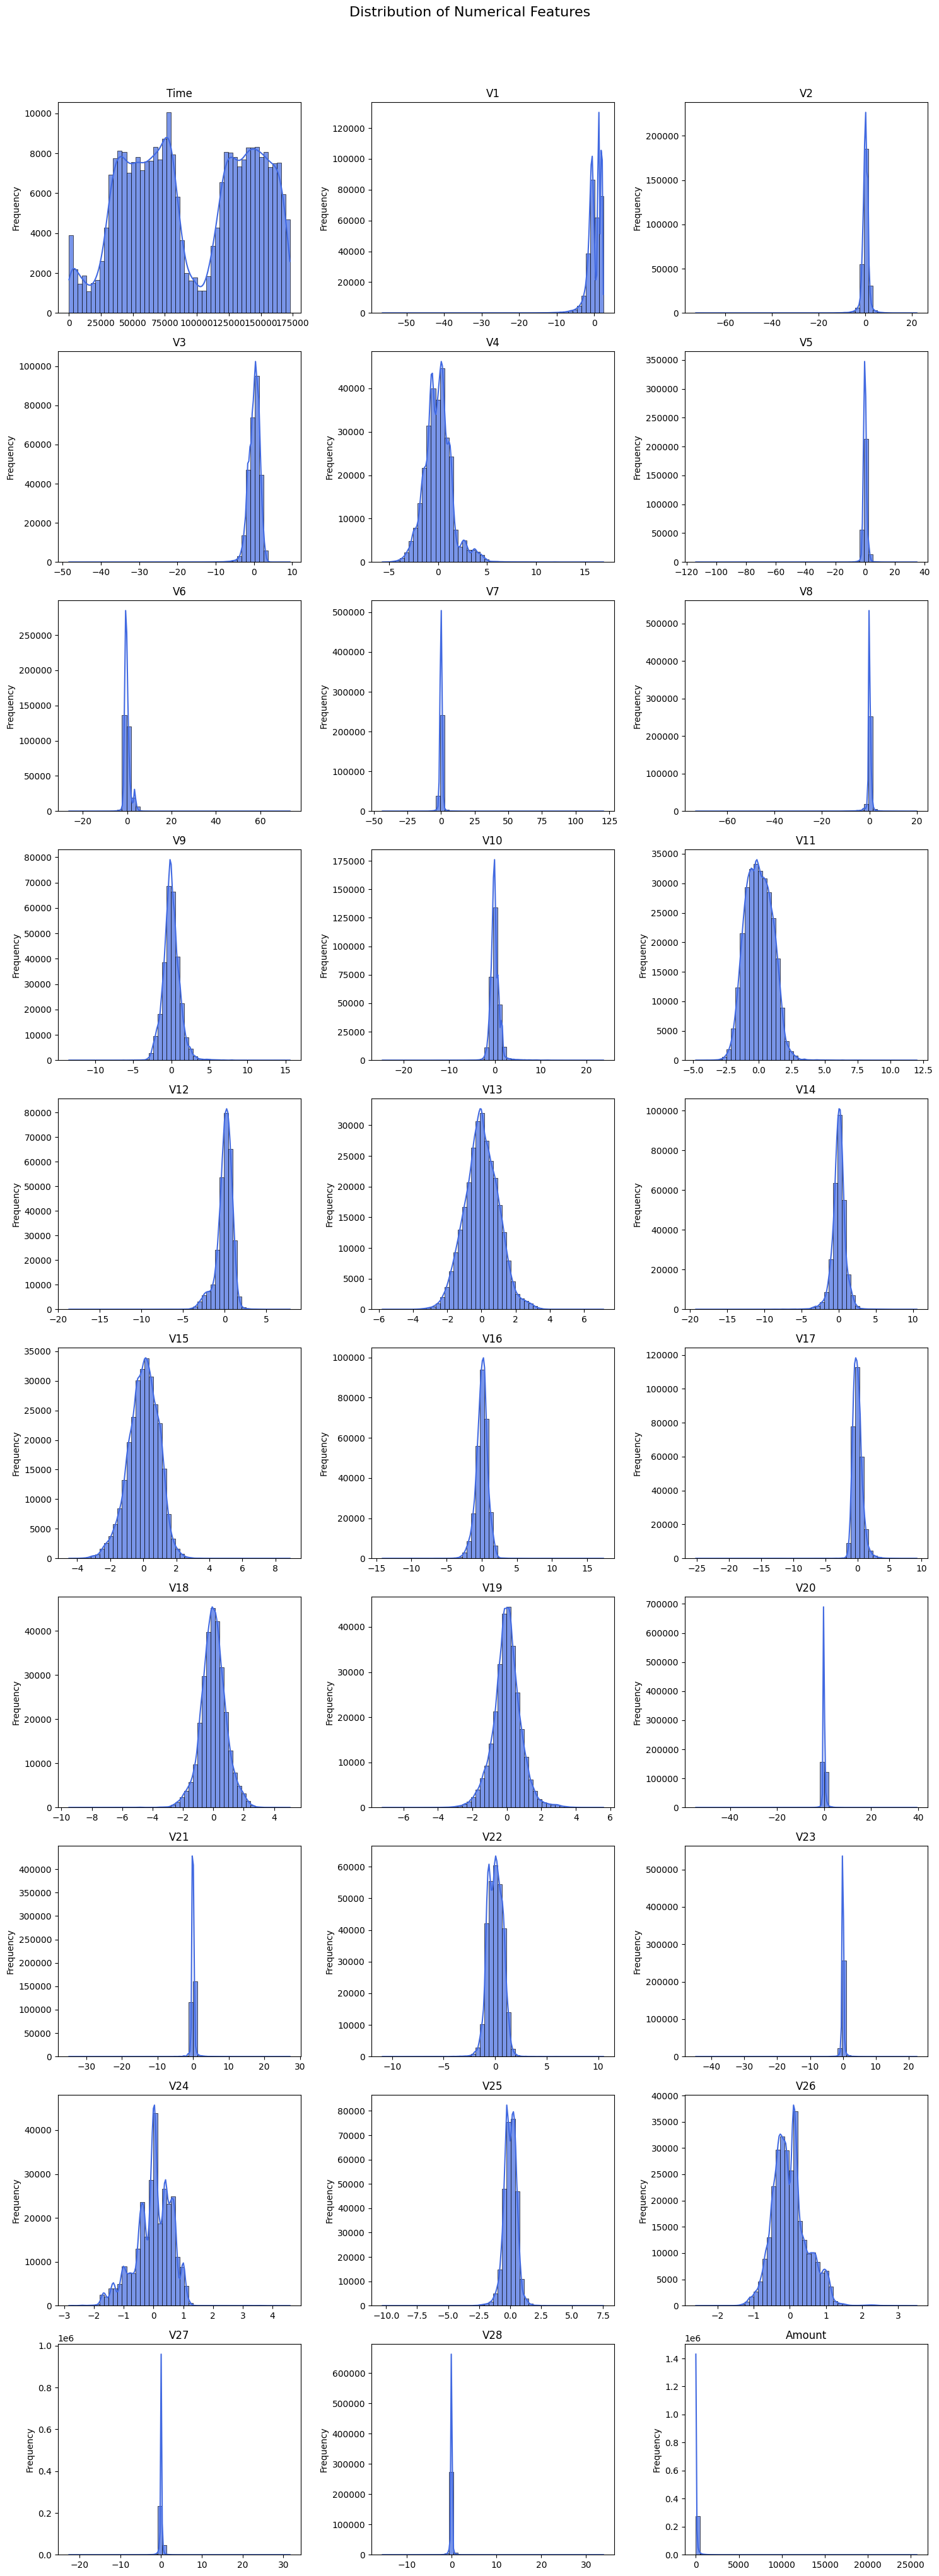

In [126]:
### Plot the histogram for univariate Analysis for all numeric columns

# Select numerical columns
num_cols = df_sample.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('Class')  # Exclude 'Class' as it's categorical

# Define number of rows and columns for subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
fig.suptitle("Distribution of Numerical Features", fontsize=16, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and plot
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=50, kde=True, color='royalblue', edgecolor='black', alpha=0.7, ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


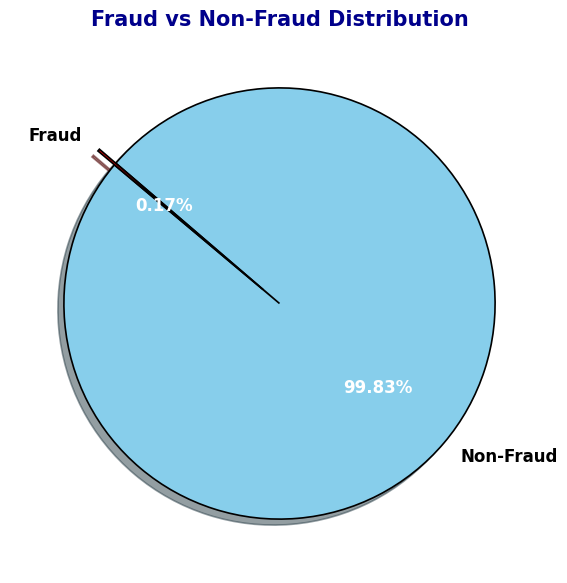

In [127]:
# Define class counts
class_counts = df['Class'].value_counts()
labels = ['Non-Fraud', 'Fraud']
colors = ['skyblue', 'red']

# Create pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    class_counts,
    labels=labels,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},  # Edge styling
    explode=[0, 0.1],  # Slightly separate Fraud slice for emphasis
    shadow=True
)

# Improve text visibility
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Title
plt.title("Fraud vs Non-Fraud Distribution", fontsize=15, fontweight='bold', color='darkblue')

# Show plot
plt.show()


From the pie-chart we can see that huge data imbalance datasets

### Bivariate Analysis:

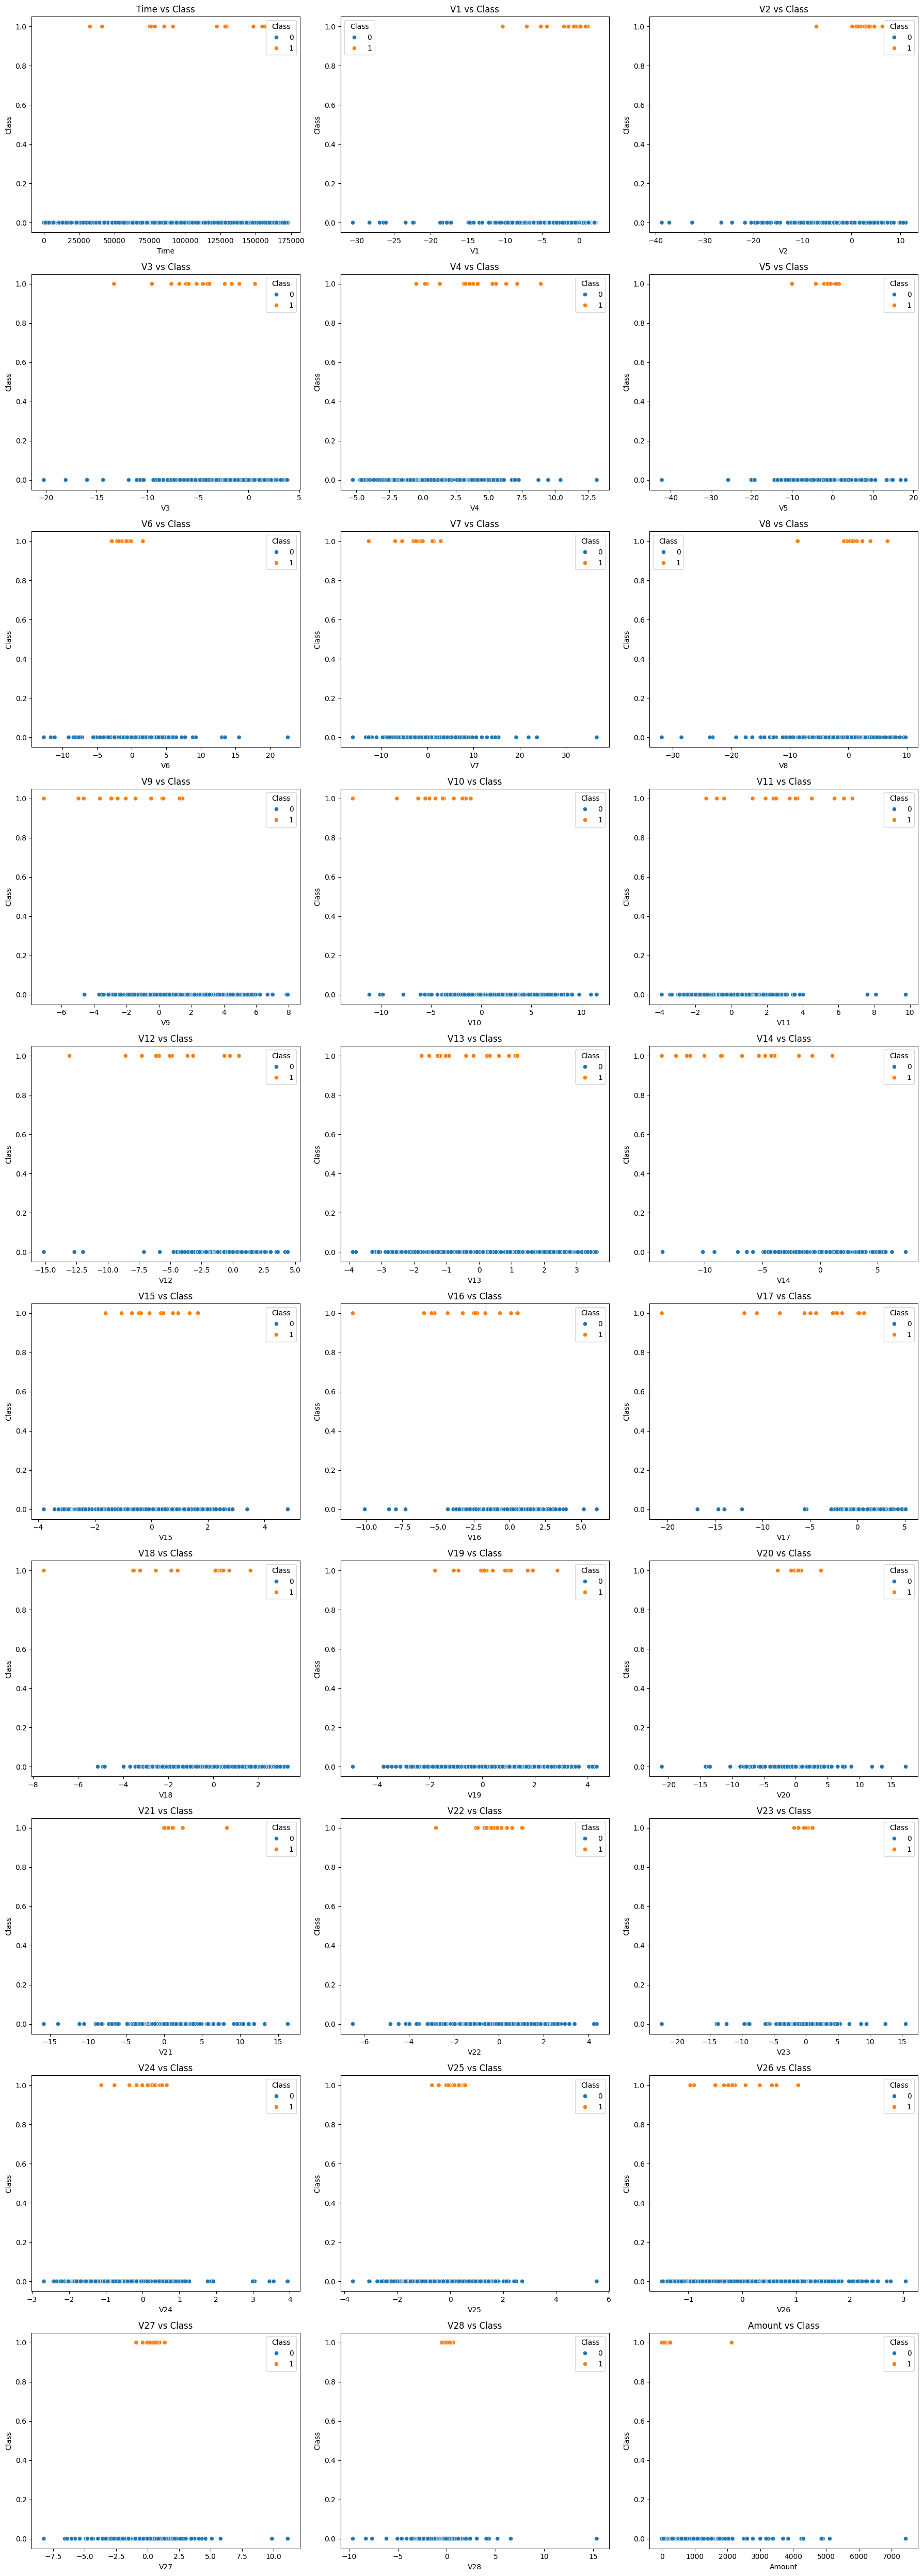

In [128]:
# Bivariate Analysis - Scatter Plots in Subplots
features = df_sample.columns.tolist()
features.remove('Class')  # Exclude target variable

num_features = len(features)
rows = num_features // 3 + (num_features % 3 > 0)  # Arrange in 3 columns
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df_sample[feature], y=df_sample['Class'],hue=df_sample['Class'],ax=axes[i])
    axes[i].set_title(f'{feature} vs Class')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Class')

plt.tight_layout()
plt.show()




1. **Class Imbalance:**  
   - The dataset has significantly more non-fraudulent transactions (Class 0) than fraudulent ones (Class 1).
   - This suggests that resampling techniques like SMOTE or anomaly detection methods may be required.

2. **Feature Separability:**  
   - Certain features, such as **V10, V12, V14, V17, and V18**, show a clear distinction between fraud and non-fraud cases.
   - These features may be strong predictors and should be considered in model training.

3. **Overlapping Features:**  
   - Some features (e.g., **V22, V24, V25**) do not exhibit clear separability, meaning they may contribute less to classification.
   - Feature selection techniques like PCA or mutual information analysis can help determine their relevance.

4. **Time & Amount Distribution:**  
   - The **Time** and **Amount** features do not show a clear separation for fraudulent transactions.
   - Further feature engineering, such as scaling or aggregating transaction data over time, may improve their predictive power.

5. **Next Steps for Analysis:**  
   - **Correlation Analysis**: Compute feature correlations to identify redundancy.
   - **Feature Engineering**: Normalize/scale numerical features, extract meaningful aggregations.
   - **Class Balancing**: Implement oversampling (SMOTE) or undersampling techniques.
   - **Model Training & Evaluation**: Test ML models (Logistic Regression, Random Forest, XGBoost) using AUC-ROC and precision-recall metrics.

---


In [129]:
df["Timestamp"] = pd.to_datetime(df["Time"], unit="s")  # Convert Time (seconds) to timestamp
df.set_index("Timestamp", inplace=True)  # Set as index for time-series analysis

<ipython-input-130-85ae23ee421c>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sns.lineplot(data=df.resample("1H").count(), x=df.resample("1H").count().index, y="Amount", label="Total Transactions", color="blue")


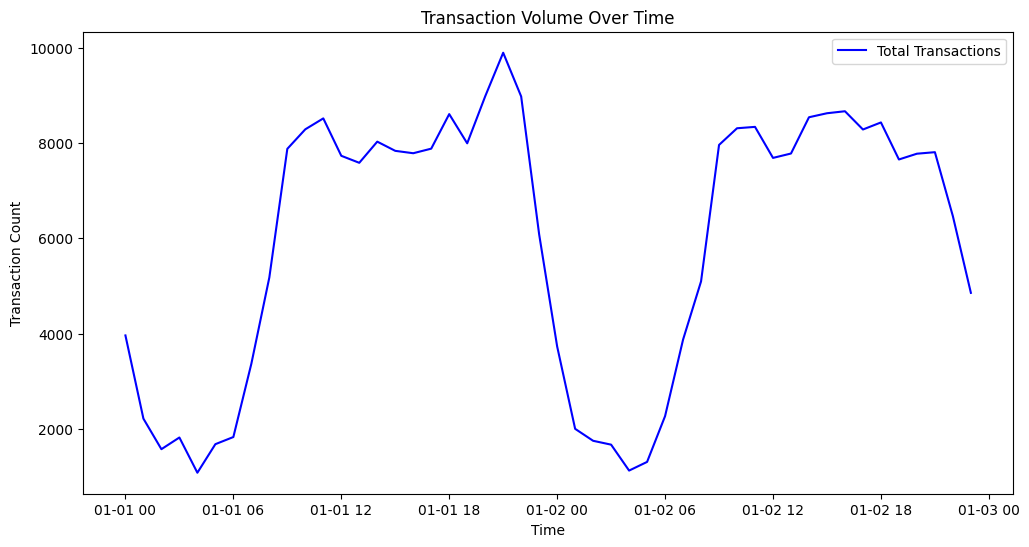

In [130]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.resample("1H").count(), x=df.resample("1H").count().index, y="Amount", label="Total Transactions", color="blue")
plt.xlabel("Time")
plt.ylabel("Transaction Count")
plt.title("Transaction Volume Over Time")
plt.legend()
plt.show()


Identifies peak transaction times

### Analyzing Fraudulent vs. Non-Fraudulent Transactions Over Time

<ipython-input-131-91d8acff5598>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Class"] == 0]["Time"], label="Non-Fraudulent", shade=True, color="blue")
<ipython-input-131-91d8acff5598>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Class"] == 1]["Time"], label="Fraudulent", shade=True, color="red")


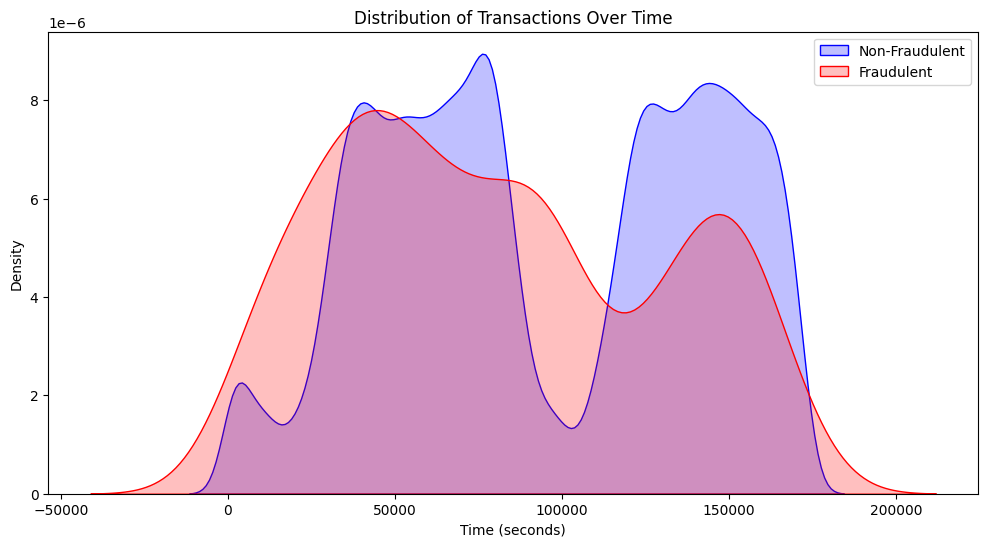

In [131]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df["Class"] == 0]["Time"], label="Non-Fraudulent", shade=True, color="blue")
sns.kdeplot(df[df["Class"] == 1]["Time"], label="Fraudulent", shade=True, color="red")
plt.xlabel("Time (seconds)")
plt.ylabel("Density")
plt.title("Distribution of Transactions Over Time")
plt.legend()
plt.show()


Detects whether frauds occur at specific times.

### Grouping Transactions by Time Intervals

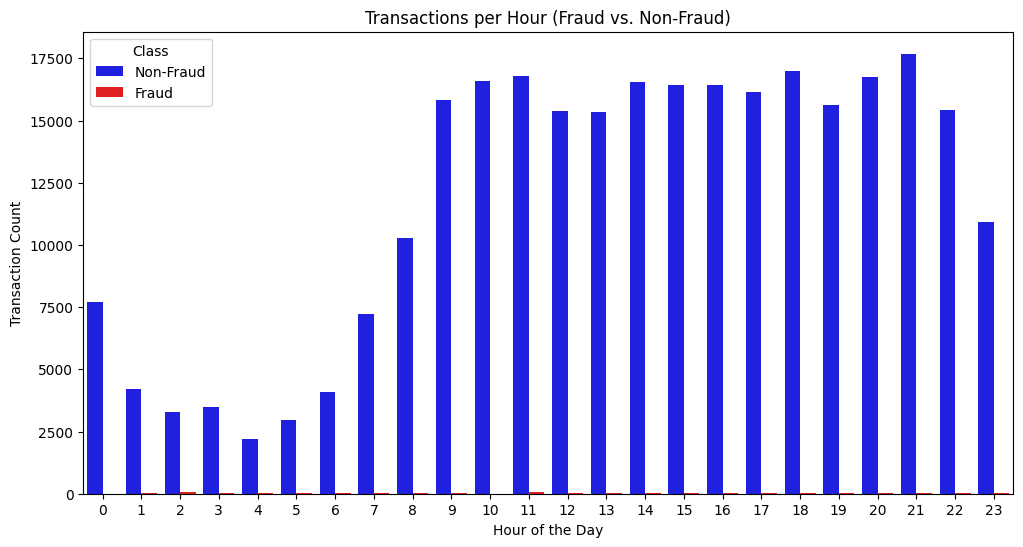

In [132]:
df["Hour"] = df.index.hour  # Extract the hour from timestamp

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Hour", hue="Class", palette=["blue", "red"])
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.title("Transactions per Hour (Fraud vs. Non-Fraud)")
plt.legend(title="Class", labels=["Non-Fraud", "Fraud"])
plt.show()


 Determines if fraud occurs more frequently at specific hours.

### Moving Average to Detect Trends


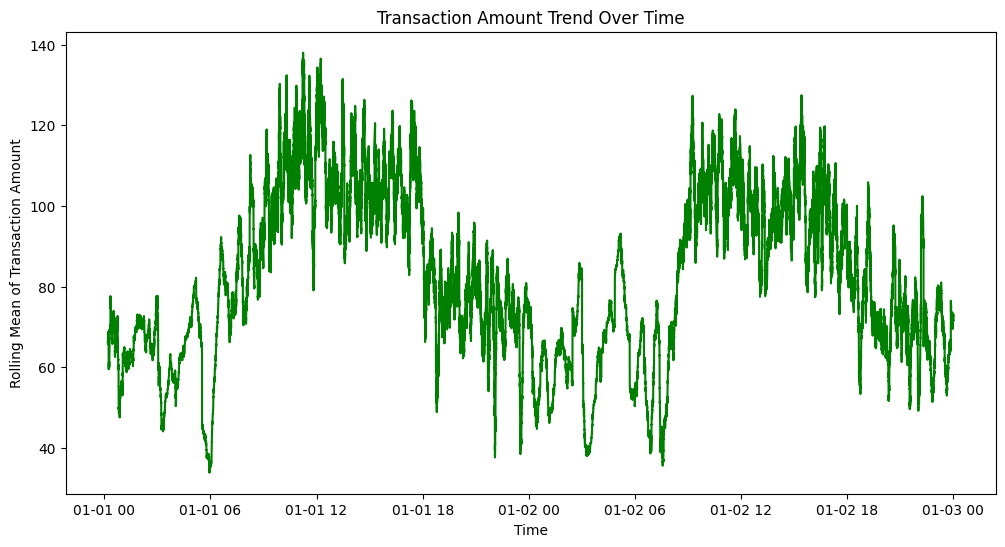

In [133]:
df["Rolling_Amount"] = df["Amount"].rolling(window=1000).mean()  # 1000 transactions rolling avg

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Rolling_Amount"], color="green")
plt.xlabel("Time")
plt.ylabel("Rolling Mean of Transaction Amount")
plt.title("Transaction Amount Trend Over Time")
plt.show()


Identifies patterns in transaction amounts.



<ipython-input-134-d9e41778dcf4>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample("H").sum()["Amount"]


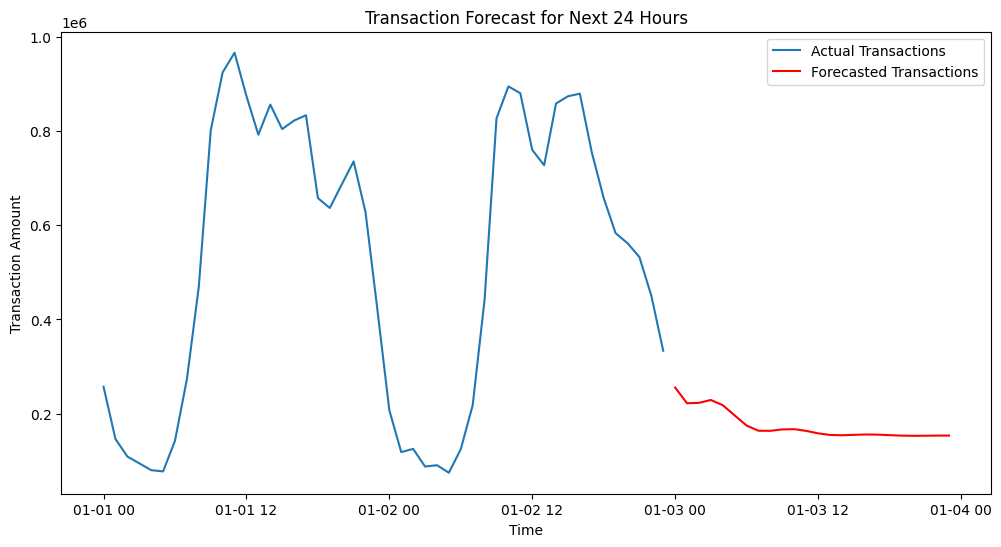

In [134]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate data by hour
df_hourly = df.resample("H").sum()["Amount"]

# Fit ARIMA Model
model = ARIMA(df_hourly, order=(5,1,0))  # Adjust order as needed
model_fit = model.fit()

# Predict next 24 hours
forecast = model_fit.forecast(steps=24)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df_hourly, label="Actual Transactions")
plt.plot(forecast, label="Forecasted Transactions", color="red")
plt.xlabel("Time")
plt.ylabel("Transaction Amount")
plt.title("Transaction Forecast for Next 24 Hours")
plt.legend()
plt.show()


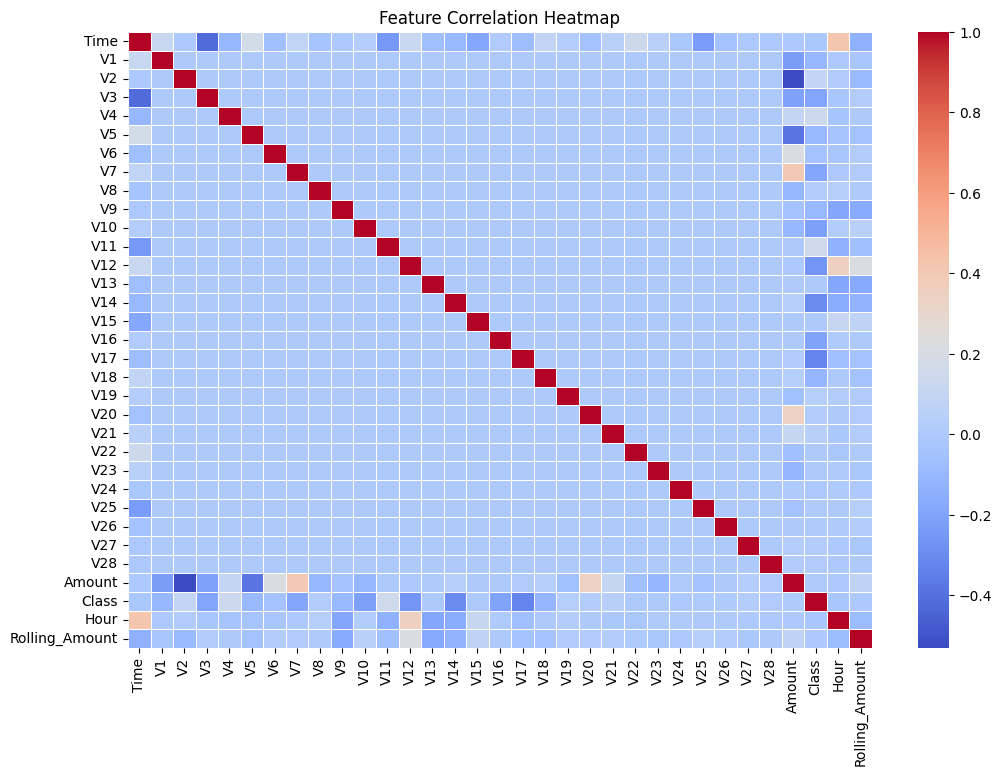

In [135]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Observations:
- Some features like V7 and V20 show a higher correlation with fraudulent transactions.
- Some features like V4,V6,V21 are slight  correlated with fraudulent transactions.

In [139]:
df.drop("Rolling_Amount",axis=1,inplace=True)

## 4. Data Preparation for Modeling

In [141]:
# For Data Imbalace we can use SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable

X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply SMOTE to handle imbalanced data
smote = SMOTE(sampling_strategy='minority', random_state=1)
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

## Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_oversampling)

X_test_scaled = scaler.transform(X_test)

# Print the new class distribution
print("New Class Distribution:")

class_counts = pd.Series(y_train_oversampling).value_counts()
print(class_counts)


New Class Distribution:
Class
0    227440
1    227440
Name: count, dtype: int64


### Feature Selection Using Feature Importance (Random Forest)

Training RandomForestClassifier...

Training completed!



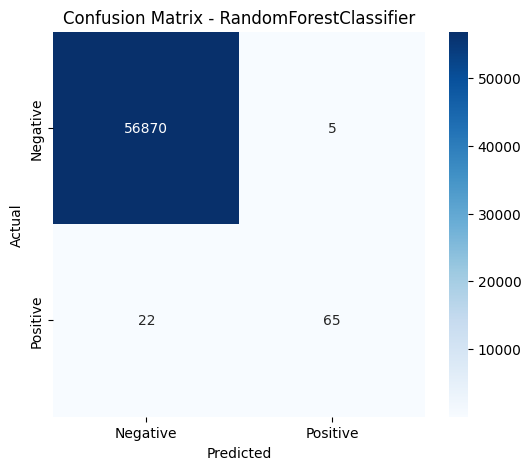


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.75      0.83        87

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



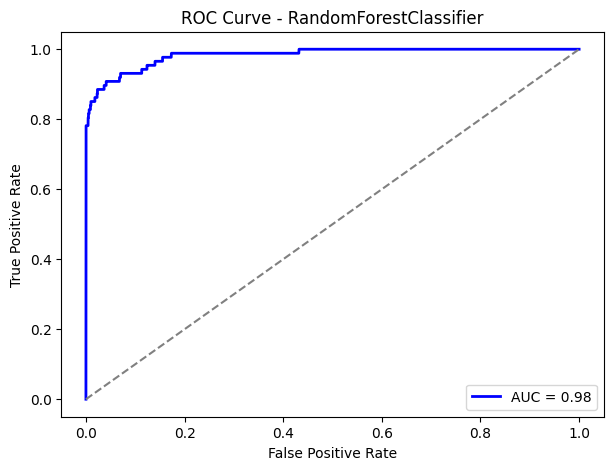

['random_forest_model.pkl']

In [151]:

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

train_and_evaluate(rf_model,X_train_selected, y_train, X_test_selected, y_test)

## Save randomForest classifier model
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

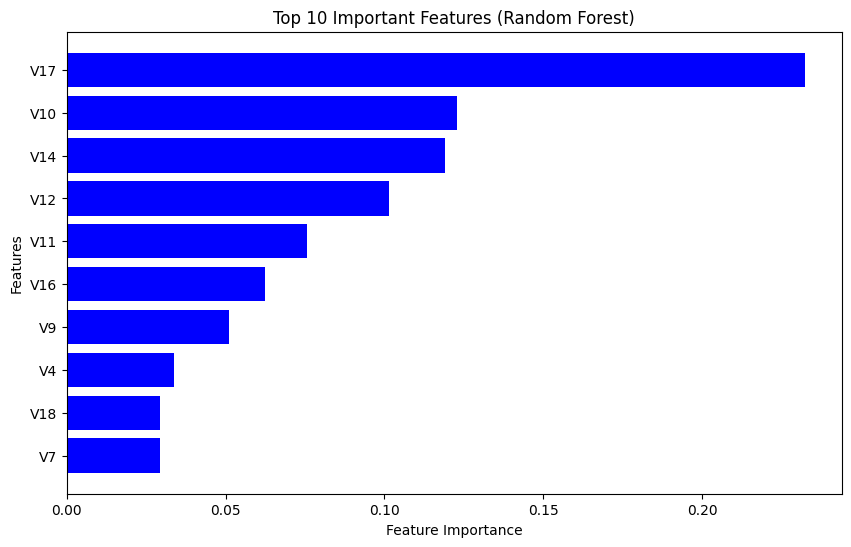

In [153]:
# Get Feature Importance
feature_importance = rf_model.feature_importances_

# Convert to DataFrame for better visualization
# Use selected_features instead of X_train.columns
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Top Features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features (Random Forest)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Selecting Top 10 Features
selected_features = feature_importance_df["Feature"][:10].values
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [154]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_cv(model, X_train, y_train, X_test, y_test, cv_folds=5):
    """
    Train a machine learning model using Cross-Validation and evaluate its performance.

    Parameters:
    model: The machine learning model (e.g., LogisticRegression, RandomForestClassifier)
    X_train, y_train: Training data
    X_test, y_test: Testing data
    cv_folds: Number of cross-validation folds (default: 5)
    """

    model_name = model.__class__.__name__
    print(f"Training {model_name} with {cv_folds}-fold cross-validation...\n")

    # Perform Cross-Validation
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}\n")

    # Train on the full training set
    model.fit(X_train, y_train)
    print(f"Training completed!\n")

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    precision, recall, f1_score = classification_rep["1"]["precision"], classification_rep["1"]["recall"], classification_rep["1"]["f1-score"]

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve (Only if model supports probability prediction)
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend(loc="lower right")
        plt.show()


Training LogisticRegression...



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training completed!



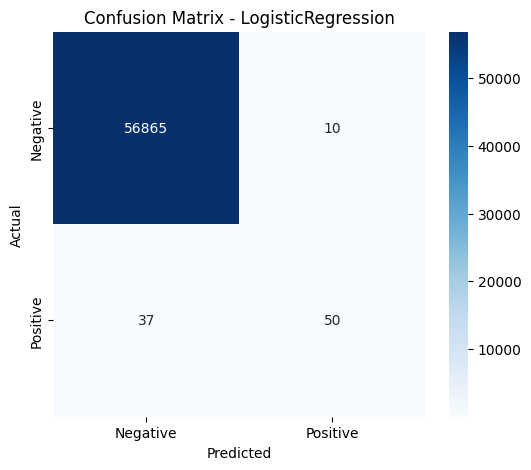


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.83      0.57      0.68        87

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



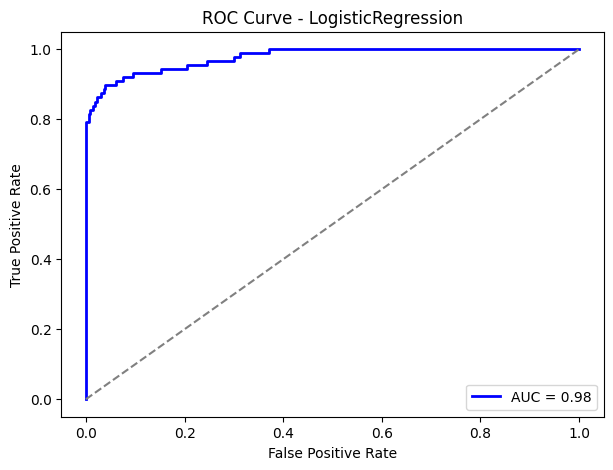

In [155]:

# Train and evaluate Logistic Regression
log_reg = LogisticRegression(solver='saga', max_iter=200)
train_and_evaluate(log_reg, X_train_selected, y_train, X_test_selected, y_test)



In [156]:
from xgboost import XGBClassifier

Training XGBClassifier...



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training completed!



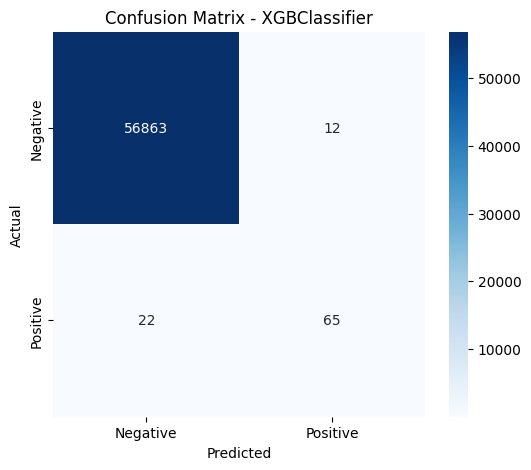


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.84      0.75      0.79        87

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



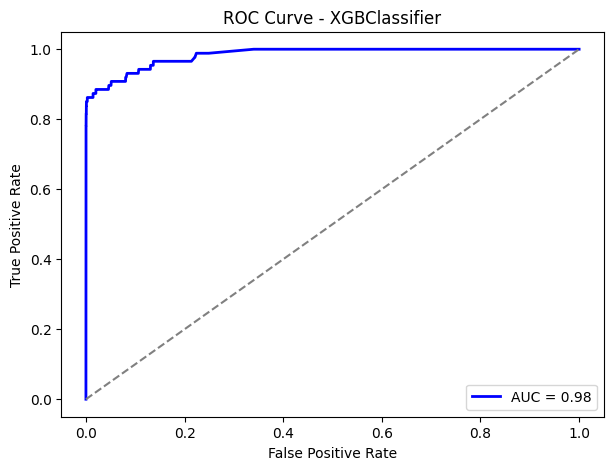

In [157]:
## XG Boost model
xg_model = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric="logloss")
train_and_evaluate(xg_model, X_train_selected, y_train, X_test_selected, y_test)

Training HistGradientBoostingClassifier...

Training completed!



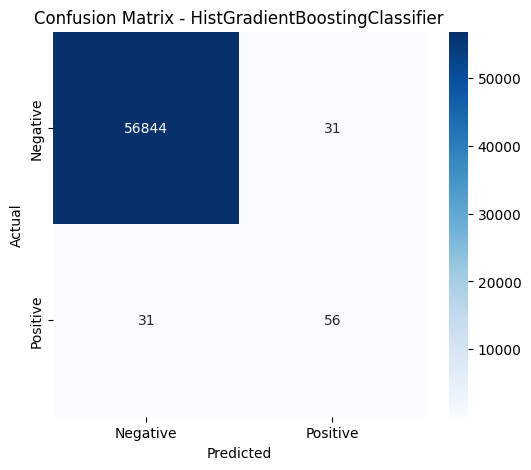


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.64      0.64      0.64        87

    accuracy                           1.00     56962
   macro avg       0.82      0.82      0.82     56962
weighted avg       1.00      1.00      1.00     56962



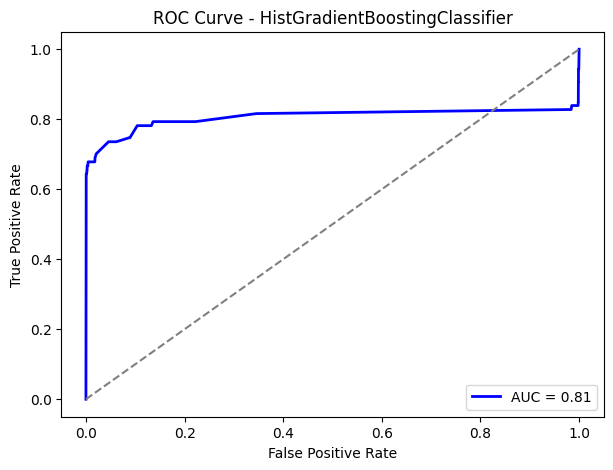

In [158]:
from sklearn.ensemble import HistGradientBoostingClassifier
hist_model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=5)
train_and_evaluate(hist_model,X_train_selected, y_train, X_test_selected, y_test)

In [148]:
#save in the github
